In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def readloss(file):
    with open(file) as fid:
        lines = fid.read().splitlines()
        
    epoches = []
    losses = []
    for line in lines:
        if line.find('loss') == -1:  continue
        parts = line.split()
        for part in parts:
            if part.find('epoch') != -1:
                epoches.append(int(part[5:]))
                break
        loss = [float(x) for x in parts[-2:]]
        losses.append(loss)
    epoches = np.array(epoches)
    losses = np.array(losses)
    return epoches, losses

## this is the first 400 iterations

In [27]:
with open('./sngan-hinge-resnet-64x64/logs_kick.dir/_2022-07-07_07-53-04/config.pkl', 'rb') as fid:
    config = pickle.load(fid)
config

{'GAN_type': 'SNGAN-hinge',
 'lambda': 10,
 'lr_G': 0.0002,
 'lr_D': 0.0002,
 'batch_size': 128,
 'epoches': 400,
 'dim': 256,
 'zdim': 128,
 'D_step': 1,
 'G_step': 5,
 'z_samples': 100,
 'log_dir': './logs_kick.dir/',
 'ckpt_dir': './ckpts_kick.dir/',
 'kick': False}

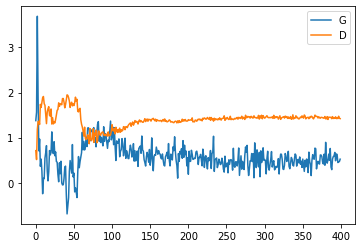

In [28]:
file = './sngan-hinge-resnet-64x64/logs_kick.dir/_2022-07-07_07-53-04/log.txt'
epoches, losses = readloss(file)
plt.plot(epoches, losses, label=['G','D']);plt.legend();

## the second 400 with reduced lr

In [29]:
with open('./sngan-hinge-resnet-64x64-round2/logs_kick.dir/_2022-07-11_05-22-47/config.pkl', 'rb') as fid:
    config = pickle.load(fid)
config

{'GAN_type': 'SNGAN-hinge',
 'lambda': 10,
 'lr_G': 5e-05,
 'lr_D': 5e-05,
 'batch_size': 256,
 'epoches': 400,
 'dim': 256,
 'zdim': 128,
 'D_step': 1,
 'G_step': 5,
 'z_samples': 100,
 'log_dir': './logs_kick.dir/',
 'ckpt_dir': './ckpts_kick.dir/',
 'kick': False}

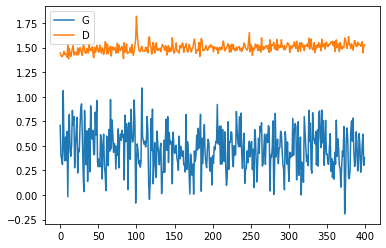

In [30]:
file = './sngan-hinge-resnet-64x64-round2/logs_kick.dir/_2022-07-11_05-22-47/log.txt'
epoches, losses = readloss(file)
plt.plot(epoches, losses, label=['G','D']);plt.legend();

## seems hard to improve anymore
## check out the GANed figures

In [32]:
import imageio
from PIL import Image
from torchvision.utils import make_grid
from torchvision.transforms import transforms
from glob import glob
import os

In [33]:
imgs = []
folder = './sngan-hinge-resnet-64x64/logs_kick.dir/_2022-07-07_07-53-04/'
for epoch in range(0,400,5):
    img = Image.open(os.path.join(folder,f"epoch_{epoch}.jpg"))    
    img = np.array(img)
    imgs.append(img)
plt.figure(figsize=[20,20])
plt.imshow(imgs[-1])

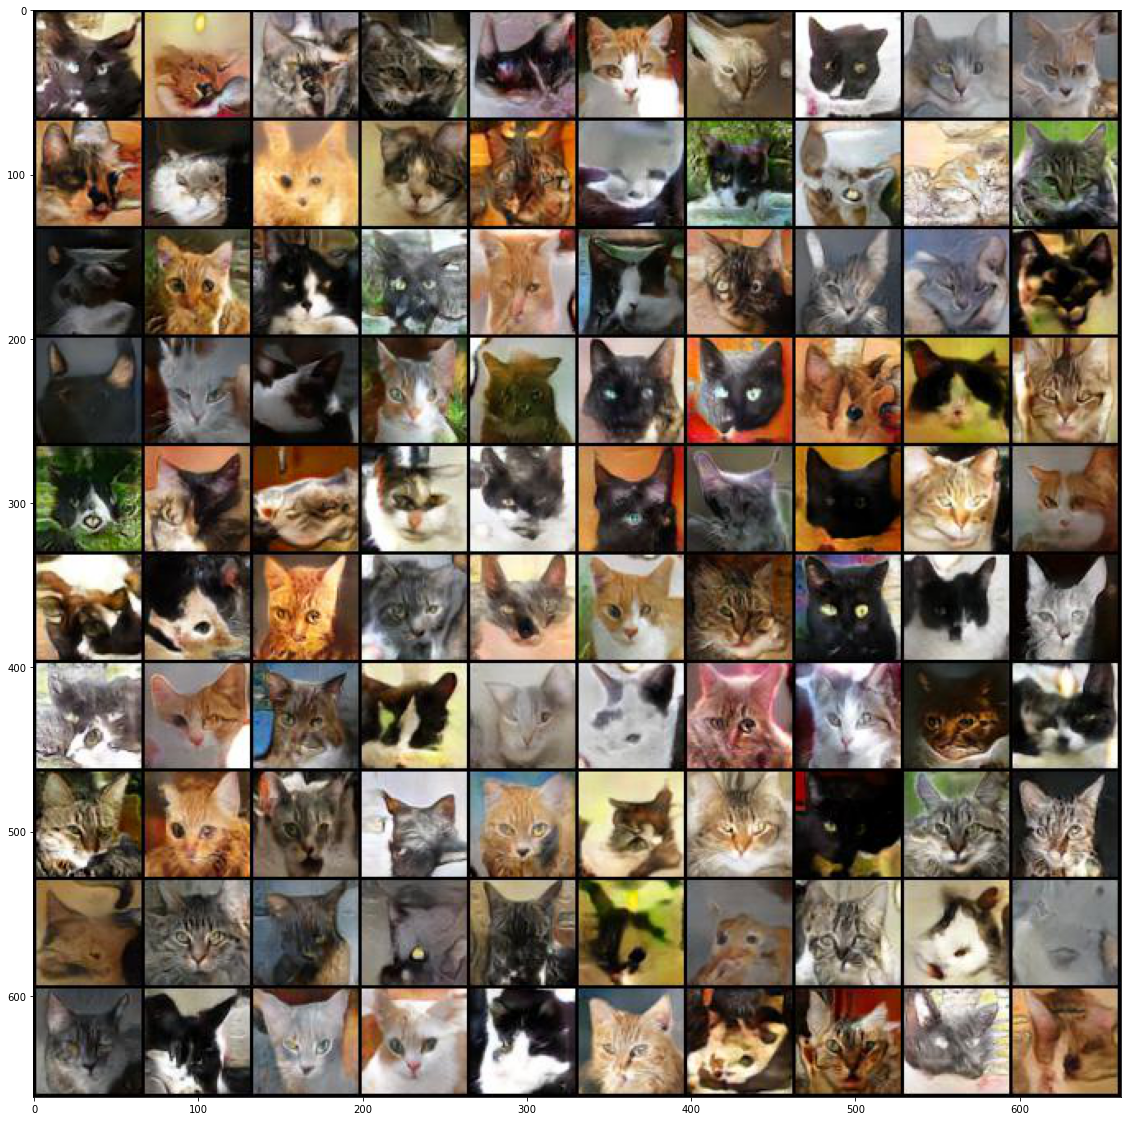

In [34]:
imgs = []
folder = './sngan-hinge-resnet-64x64-round2/logs_kick.dir/_2022-07-11_05-22-47/'
for epoch in range(0,400,5):
    img = Image.open(os.path.join(folder,f"epoch_{epoch}.jpg"))    
    img = np.array(img)
    imgs.append(img)
plt.figure(figsize=[20,20])
plt.imshow(imgs[-1])

### let's look at some original figures

In [20]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import glob

In [21]:
class MyDataset(Dataset):
    def __init__(self, fnames):
        super().__init__()
        self.fnames = fnames
        self.transform = transforms.Compose([transforms.Resize((64,64)),
                                             transforms.ToTensor()])
        self.num_images = len(fnames)

    def __len__(self):
        return self.num_images

    def __getitem__(self, idx):
        fname = self.fnames[idx]
        image = Image.open(fname)
        return self.transform(image)

In [22]:
mydataset = MyDataset(glob.glob('./cat_pictures.dir/cropped/*.jpg'))

In [23]:
tmp = [mydataset[i] for i in range(100)]
grid_img = make_grid(tmp, nrow=10)
plt.figure(figsize=[20,20])
plt.imshow(grid_img.permute(1,2,0))